<h3 style="color:green">Определение перспективного тарифа для телеком компании</h3>


Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». 
Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

Для того чтобы решить эту задачу потребуется расчитать для каждого клиента потребляемый объём услуг и провести калькуляцию согласно тарифному плану.

<h3 style="color:green">Импорт данных</h3>

исходные данные состоят из нескольких табличных файлов, импортируем необходимые библиотеки и сохраним в переменных табличные данные

In [1]:
from scipy import stats as st
import pandas as pd
import numpy as np
import math 
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.float_format = '{:,.2f}'.format

In [2]:
df_calls = pd.read_csv('calls.csv')
df_internet = pd.read_csv('internet.csv')
df_messages = pd.read_csv('messages.csv')
df_tariffs = pd.read_csv('tariffs.csv')
df_users = pd.read_csv('users.csv')

<h3 style="color:green">Описание тарифов</h3>


Тариф «Смарт»

    -Ежемесячная плата: 550 рублей
    -Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
    -Стоимость услуг сверх тарифного пакета:
    -минута разговора: 3 рубля
    -сообщение: 3 рубля
    -1 Гб интернет-трафика: 200 рублей
    
Тариф «Ультра»

    -Ежемесячная плата: 1950 рублей
    -Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
    -Стоимость услуг сверх тарифного пакета:
    -минута разговора: 1 рубль
    -сообщение: 1 рубль
    -1 Гб интернет-трафика: 150 рублей

Значения минут и мегабайт всегда округляется в большую сторону. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута.

<h3 style="color:green">Длительность звонков</h3>

       id   call_date  duration  user_id
0  1000_0  2018-07-25      0.00     1000
1  1000_1  2018-08-17      0.00     1000
2  1000_2  2018-06-11      2.85     1000

Сводная информация по таблице
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
None

Распределение значений в таблице


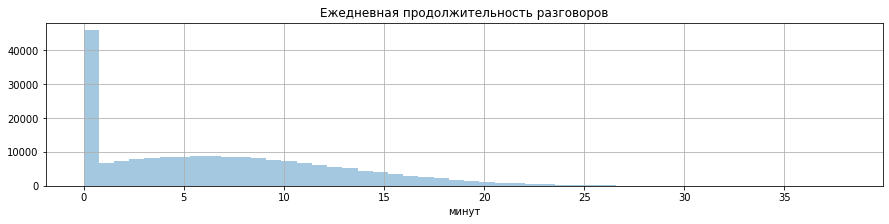

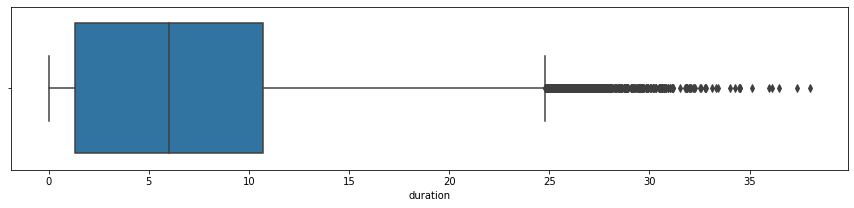


Количество пользователей с информацией о длительности вызовов: 492

Количество звонков с длительностью 0 секунд: 39613


In [3]:
print(df_calls.head(3))
print()
print('Сводная информация по таблице')
print(df_calls.info())
print()
print('Распределение значений в таблице')
fig = plt.figure(figsize=(15,3))
sns.distplot(df_calls['duration'], kde = False)
plt.grid()
plt.title('Ежедневная продолжительность разговоров')
plt.xlabel('минут')
plt.show()
fig = plt.figure(figsize=(15,3))
sns.boxplot(df_calls['duration'])
plt.show()
print()
print('Количество пользователей с информацией о длительности вызовов:',
      len(df_calls.pivot_table(index = 'user_id', values = 'duration', aggfunc = 'count')))
print()
print('Количество звонков с длительностью 0 секунд:',len(df_calls[df_calls['duration'] == 0.0]))

Данные представлены с группировкой за один день, распределение значений уже предварительно говорит о средней продолжительности разговоров.

<h3 style="color:green">Обьём интернет-трафика</h3>

   Unnamed: 0      id  mb_used session_date  user_id
0           0  1000_0   112.95   2018-11-25     1000
1           1  1000_1 1,052.81   2018-09-07     1000
2           2  1000_2 1,197.26   2018-06-25     1000

Сводная информация по таблице
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
None

Распределение значений потраченного трафика


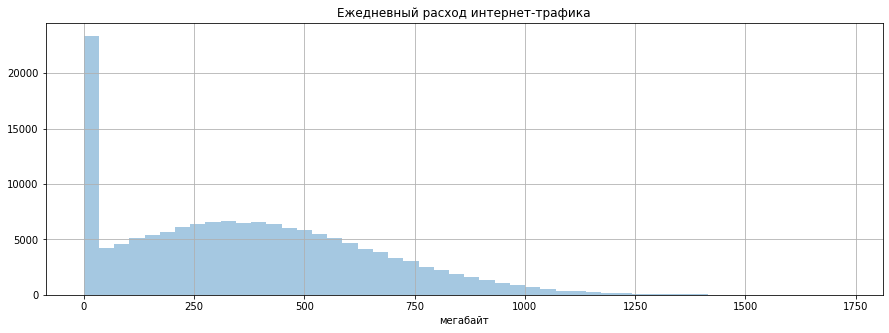

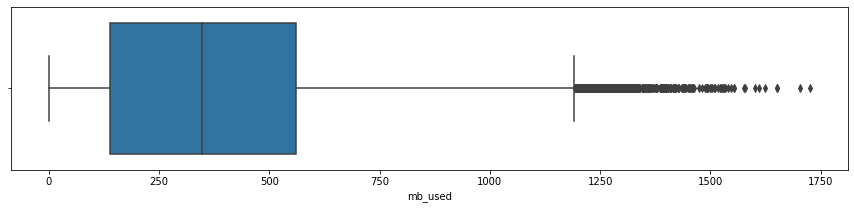

Количество пользователей с данными о потраченном трафике: 497

Количество значений с нулевым трафиком: 19598


In [4]:
print(df_internet.head(3))
print()
print('Сводная информация по таблице')
print(df_internet.info())
print()
print('Распределение значений потраченного трафика')
fig = plt.figure(figsize=(15,5))
sns.distplot(df_internet['mb_used'], kde = False)
plt.grid()
plt.xlabel('мегабайт')
plt.title('Ежедневный расход интернет-трафика')
plt.show()
fig = plt.figure(figsize=(15,3))
sns.boxplot(df_internet['mb_used'])
plt.show()

print('Количество пользователей с данными о потраченном трафике:',
      len(df_internet.pivot_table(index = 'user_id', values = 'mb_used', aggfunc = 'count')))
print()
print('Количество значений с нулевым трафиком:',len(df_internet[df_internet['mb_used'] == 0.0]))

Если не учитывать дни, в которые интернет-трафик не использовался, большинство в день укладывается в 1000 мегабайт, а чаще всего расходует от 250 до 500 мегабайт в день.

<h3 style="color:green">Отправленные сообщения</h3>


       id message_date  user_id
0  1000_0   2018-06-27     1000
1  1000_1   2018-10-08     1000
2  1000_2   2018-08-04     1000

Сводная информация по таблице
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
None



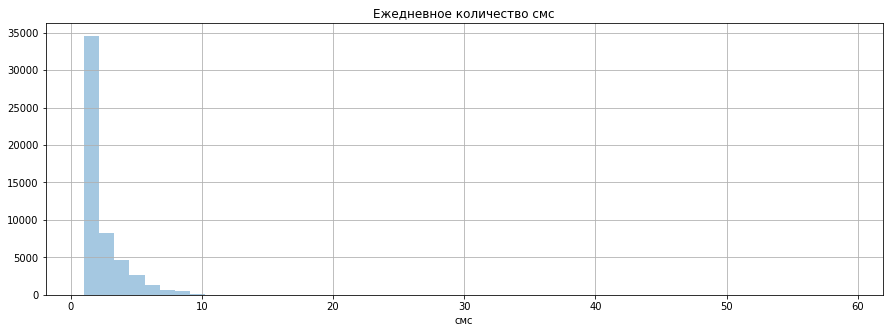

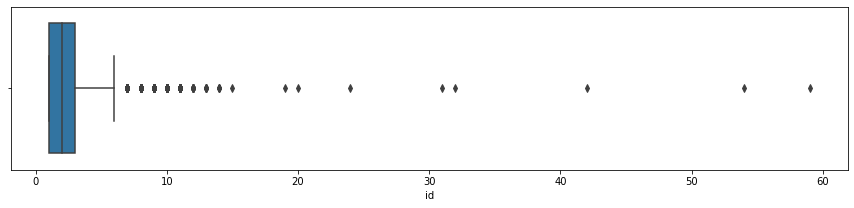

Количество пользователей с данными о количестве отправленных сообщений: 426


In [5]:
print(df_messages.head(3))
print()
print('Сводная информация по таблице')
print(df_messages.info())
print()
fig = plt.figure(figsize=(15,5))
sns.distplot(df_messages.groupby(['message_date','user_id',])['id'].count(), kde = False)
plt.xlabel('смс')
plt.title('Ежедневное количество смс')
plt.grid()
plt.show()
fig = plt.figure(figsize=(15,3))
sns.boxplot(df_messages.groupby(['message_date','user_id',])['id'].count())
plt.show()

print('Количество пользователей с данными о количестве отправленных сообщений:',
      len(df_messages.pivot_table(index = 'user_id', values = 'message_date', aggfunc = 'count')))


В день отправляется не больше 10 смс, а чаще всего пользователь вообще ими не пользуется.

<h3 style="color:green">Тарифы</h3>

In [6]:
df_tariffs.index = df_tariffs['tariff_name']
df_tariffs

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
tariff_name,,,,,,,,
smart,50,15360,500,550,200,3,3,smart
ultra,1000,30720,3000,1950,150,1,1,ultra


<h1 style="color:green; margin-bottom:5px">Пользователи</h1>


   user_id  age churn_date         city first_name  last_name    reg_date  \
0     1000   52        NaN    Краснодар     Рафаил  Верещагин  2018-05-25   
1     1001   41        NaN       Москва       Иван       Ежов  2018-11-01   
2     1002   59        NaN  Стерлитамак    Евгений  Абрамович  2018-06-17   

  tariff  
0  ultra  
1  smart  
2  smart  

Информация о таблице
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
None



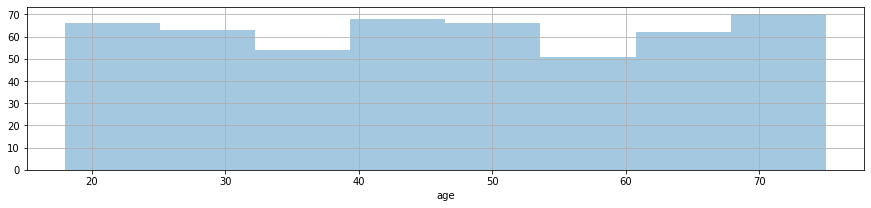

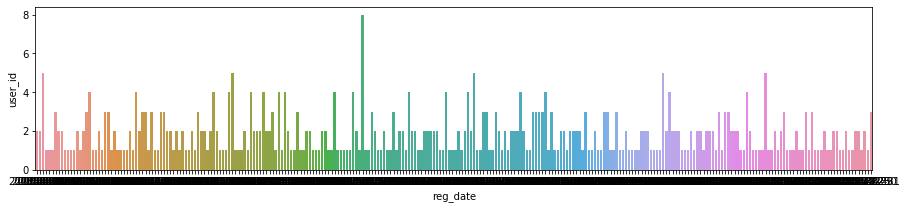

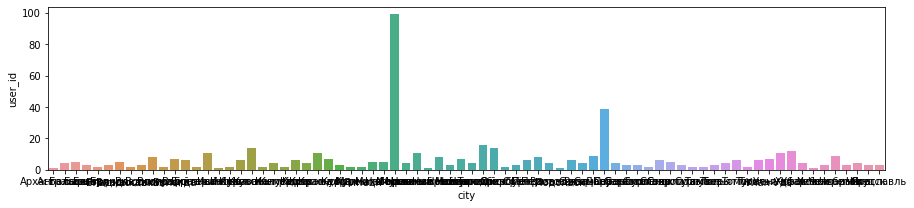

Москва             99
Санкт-Петербург    39
Новосибирск        16
Казань             14
Омск               14
                   ..
Иваново             1
Архангельск         1
Нижневартовск       1
Химки               1
Подольск            1
Name: city, Length: 76, dtype: int64


In [7]:
print(df_users.head(3))
print()
print('Информация о таблице')
print(df_users.info())
print()
fig = plt.figure(figsize=(15,3))
sns.distplot(df_users['age'], kde = False)
plt.grid()
plt.show()
fig = plt.figure(figsize=(15,3))
sns.barplot(x = 'reg_date', y = 'user_id', data = df_users.groupby('reg_date').count()['user_id'].reset_index())
plt.show()
fig = plt.figure(figsize=(15,3))
sns.barplot(x = 'city', y = 'user_id', data = df_users.groupby('city').count()['user_id'].reset_index())
plt.show()
print(df_users['city'].value_counts())

Пользователи всех возрастов представлены в равных долях, регистрировались в течение всего периода равномерно, В Москве и Санкт-Петербурге в разы больше абонентов.

<h3 style="color:green">Нулевая длительность звонков</h3>  

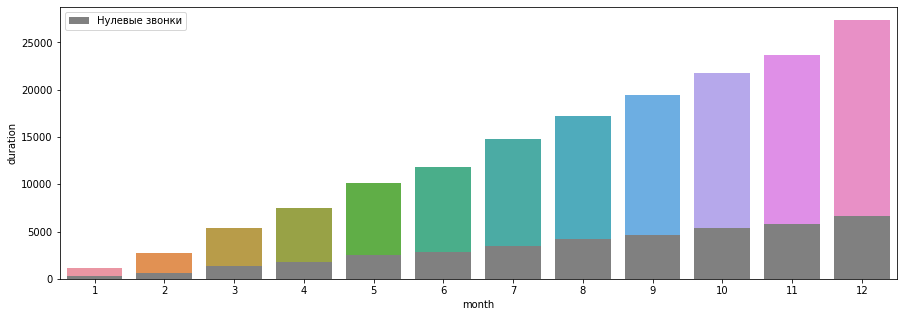

In [8]:
df_calls['call_date'] = pd.to_datetime(df_calls['call_date'], format = '%Y-%m-%d')
df_calls['month'] = df_calls['call_date'].dt.month

fig = plt.figure(figsize=(15,5))
ax = sns.barplot(x = 'month', y = 'duration', data = df_calls[df_calls['duration'] != 0.0].pivot_table(index = 'month',
                          values = 'duration',aggfunc = 'count').reset_index())
ax = sns.barplot(x = 'month', y = 'duration', data = df_calls[df_calls['duration'] == 0.0].pivot_table(index = 'month',
                          values = 'duration',aggfunc = 'count').reset_index(), color = 'grey', label = 'Нулевые звонки')
plt.legend()
plt.show()

Количество нулевых звонков подозрительно равномерно, в каждый месяц примерно 1/4 от звонков, для которых продолжительность больше ноля. Эту информацию в дальнейшем точно следует дополнительно проверять с теми кто готовит данные для анализа.

Нулевые значения длительности звонка могли возникнуть из за ошибок или неточностей округления, возможно есть проблема с фиксацией коротких звонков.


In [9]:
# Для работы с датой и возможностью группировать данные для каждого месяца приведем данные к соответствующему типу. 
df_calls['duration'] = df_calls['duration'].apply(np.ceil)
df_calls['duration'] = df_calls['duration'].astype(int)

<h3 style="color:green">Нулевые значения потребленного трафика</h3>  


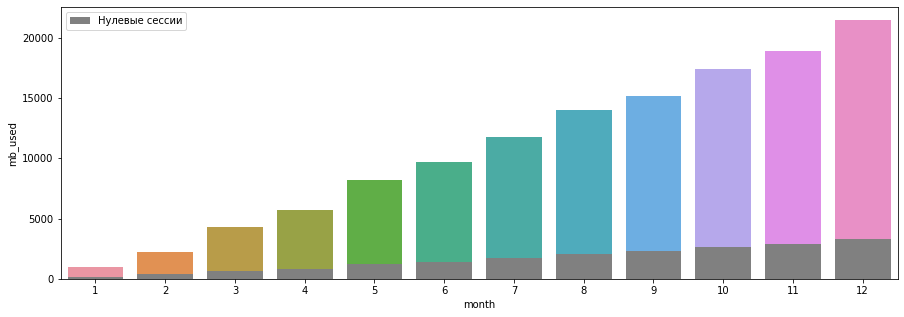

In [10]:
# для таблицы с трафиков также приводим столбец с датой к нужному типу
df_internet['session_date'] = pd.to_datetime(df_internet['session_date'], format = '%Y-%m-%d')
df_internet['month'] = df_internet['session_date'].dt.month
# построим график по месяцам, выведем сначала количество ненулевых звонков, потом нулевые
# так как нулевые звонки в меньшем количестве, их можно сразу наглядно увидеть на графике 
fig = plt.figure(figsize=(15,5))
ax = sns.barplot(x = 'month', y = 'mb_used', data = df_internet[df_internet['mb_used'] != 0.0].pivot_table(index =  'month',
           values = 'mb_used',aggfunc = 'count').reset_index())
ax = sns.barplot(x = 'month', y = 'mb_used', data = df_internet[df_internet['mb_used'] == 0.0].pivot_table(index =  'month',
           values = 'mb_used',aggfunc = 'count').reset_index(), color = 'grey', label = 'Нулевые сессии')
plt.legend()
plt.show()

Как и в случае со звонками нулевые значения распределены равномерно, нужно разбираться почему такие данные вообще выгружаются. Это может быть и спецификой использования услуг пользователями, просто есть доля тех, кто не использует интернет.

<h3 style="color:green; margin-bottom:5px">Нулевые значения потребленного трафика</h3> 


Дату в таблице приводим к необходимому формату, трафик округляем.

In [11]:
df_internet['month'] = df_internet['session_date'].dt.month
df_internet['id'] = df_internet['id'].astype(int)
df_internet['mb_used'] = df_internet['mb_used'].apply(np.ceil)
df_internet['mb_used'] = df_internet['mb_used'].astype(int)

<h3 style="color:green">Сообщения и данные пользователей</h3> 

Таблица за 2018 год, значит и заполнить такие пропуски можно последним числом декабря. В итоге  эти данные не пригодились в этот раз, можно было и не заполнять, в какой то степени это даже искажение данных, ведь тарифы действующие.

In [12]:
df_messages['message_date'] = pd.to_datetime(df_messages['message_date'], format = '%Y-%m-%d')
df_messages['month'] = df_messages['message_date'].dt.month
df_messages['id'] = df_messages['id'].astype(int)

df_users['churn_date'] = df_users['churn_date'].fillna('2018-12-31')
df_users['churn_date'] = pd.to_datetime(df_users['churn_date'], format = '%Y-%m-%d')
df_users['reg_date'] = pd.to_datetime(df_users['reg_date'], format = '%Y-%m-%d')

<h3 style="color:green">Сводная таблица по использованию тарифов на каждый месяц</h3> 

Количество индексов взято из наибольшей таблицы с потребленным трафиком. Помимо сводной информации по расходам пользователей добавлены столбцы с информацией о городе и названии тарифа для последующей группировке по этим признакам.

In [13]:
df_internet_users = df_internet.merge(df_users, on='user_id', how = 'left')
internet_tariff = df_internet_users.pivot_table(index = ['user_id','month'], values = ['tariff','city'], aggfunc = 'first')

calls_pivot = df_calls.pivot_table(index = ['user_id','month'], values = 'duration', aggfunc = ['count','sum'])
calls_pivot.columns = ['count_calls','calls_duration']

internet_pivot = df_internet.pivot_table(index = ['user_id','month'], values = 'mb_used', aggfunc = 'sum')
internet_pivot.columns = ['mb_used']

messages_pivot = df_messages.pivot_table(index = ['user_id','month'], values = 'id', aggfunc = 'count')
messages_pivot.columns = ['messages']

total_pivot = internet_pivot.join([calls_pivot,messages_pivot,internet_tariff]).reset_index()
total_pivot.head(3)

,user_id,month,mb_used,count_calls,calls_duration,messages,city,tariff
0,1000,5,"2,256.00",22.00,159.00,22.00,Краснодар,ultra
1,1000,6,"23,257.00",43.00,172.00,60.00,Краснодар,ultra
2,1000,7,"14,016.00",47.00,340.00,75.00,Краснодар,ultra


<h1 style="color:green; margin-bottom:5px">Расходы пользователей на звонки сверх лимита тарифных планов</h1> 


In [14]:
def money_from_calls(row):
    tariff = row['tariff']
    calls = row['calls_duration']
    smart_count_calls = 500
    smart_per_minute = 3    
    ultra_count_calls = 3000
    ultra_per_minute = 1
    
    if tariff == 'smart':
        if calls > smart_count_calls:
            return (calls - smart_count_calls) * smart_per_minute
        if calls <= smart_count_calls:
            return 0
    if tariff == 'ultra':
        if calls > ultra_count_calls:
            return (calls - ultra_count_calls) * ultra_per_minute
        if calls <= ultra_count_calls:
            return 0

total_pivot['money_from_calls'] = total_pivot.apply(money_from_calls, axis = 1)    


<h1 style="color:green; margin-bottom:5px">Расходы пользователей на интернет сверх лимита тарифных планов</h1> 

In [15]:
def money_from_internet(row):
    tariff = row['tariff']
    internet = row['mb_used']
    smart_included_mb = 15360
    smart_extra_1gb = 200
    ultra_included_mb = 30720
    ultra_extra_1gb = 150
    
    if tariff == 'smart':
        if internet > smart_included_mb:
            return smart_extra_1gb * math.ceil((internet - smart_included_mb) / 1024)
        if internet <= smart_included_mb:
            return 0
    if tariff == 'ultra':
        if internet > ultra_included_mb:
            return ultra_extra_1gb * math.ceil((internet - ultra_included_mb) / 1024)
        if internet <= ultra_included_mb:
            return 0
        
total_pivot['money_from_internet'] = total_pivot.apply(money_from_internet, axis = 1)

<h1 style="color:green; margin-bottom:5px">Расходы пользователей на отправленные сообщения сверх лимита тарифных планов</h1> 

In [16]:
def money_from_messages(row):
    tariff = row['tariff']
    messages = row['messages']
    smart_messages_incuded = 50
    smart_extra_message = 3
    ultra_messages_incuded = 1000
    ultra_extra_message = 1
    if tariff == 'smart':
        if messages > smart_messages_incuded:
            return smart_extra_message * (messages - smart_messages_incuded)
        if messages <= smart_messages_incuded:
            return 0
    if tariff == 'ultra':
        if messages > ultra_messages_incuded:
            return ultra_extra_message * (messages - ultra_messages_incuded) 
        if messages <= ultra_messages_incuded:
            return 0
        
total_pivot['money_from_messages'] = total_pivot.apply(money_from_messages, axis = 1)  

<h1 style="color:green; margin-bottom:5px">Ежемесячная оплата тарифного плана</h1> 

In [17]:
def tariff(row):
    tariff = row['tariff']
    smart = 550
    ultra = 1950
    if tariff == 'smart':
        return smart
    if tariff == 'ultra':
        return ultra
    
total_pivot['tariff_costs'] = total_pivot.apply(tariff, axis = 1)

<h1 style="color:green; margin-bottom:5px">Суммарные расходы клиентов Мегалайн в месяц</h1> 

In [18]:
def money_total(row):
    calls = row['money_from_calls']
    internet = row['money_from_internet']
    messages = row['money_from_messages']
    tariff = row['tariff_costs']
    total = calls + internet + messages + tariff
    return total

total_pivot['total_money'] = total_pivot.apply(money_total, axis = 1)
total_pivot.head(3)

,user_id,month,mb_used,count_calls,calls_duration,messages,city,tariff,money_from_calls,money_from_internet,money_from_messages,tariff_costs,total_money
0,1000,5,"2,256.00",22.00,159.00,22.00,Краснодар,ultra,0.00,0,0.00,1950,"1,950.00"
1,1000,6,"23,257.00",43.00,172.00,60.00,Краснодар,ultra,0.00,0,0.00,1950,"1,950.00"
2,1000,7,"14,016.00",47.00,340.00,75.00,Краснодар,ultra,0.00,0,0.00,1950,"1,950.00"


фильтрация данных по тарифам и регионам

In [19]:
# для удобства сохраним в переменные данные с фильтром по тарифу и региону
smart = total_pivot[total_pivot['tariff'] == 'smart'].dropna().reset_index(drop = True)
ultra = total_pivot[total_pivot['tariff'] == 'ultra'].dropna().reset_index(drop = True)
moscow = total_pivot[total_pivot['city'] == 'Москва'].dropna().reset_index(drop = True)
regions = total_pivot[total_pivot['city'] != 'Москва'].dropna().reset_index(drop = True)
moscow_smart = total_pivot[(total_pivot['city'] == 'Москва') & (total_pivot['tariff'] == 'smart')].dropna().reset_index(drop = True)
regions_smart = total_pivot[(total_pivot['city'] != 'Москва') & (total_pivot['tariff'] == 'smart')].dropna().reset_index(drop = True)
moscow_ultra = total_pivot[(total_pivot['city'] == 'Москва') & (total_pivot['tariff'] == 'ultra')].dropna().reset_index(drop = True)
regions_ultra = total_pivot[(total_pivot['city'] != 'Москва') & (total_pivot['tariff'] == 'ultra')].dropna().reset_index(drop = True)

<h1 style="color:green; margin-bottom:5px">Статистика использования тарифов</h1> 

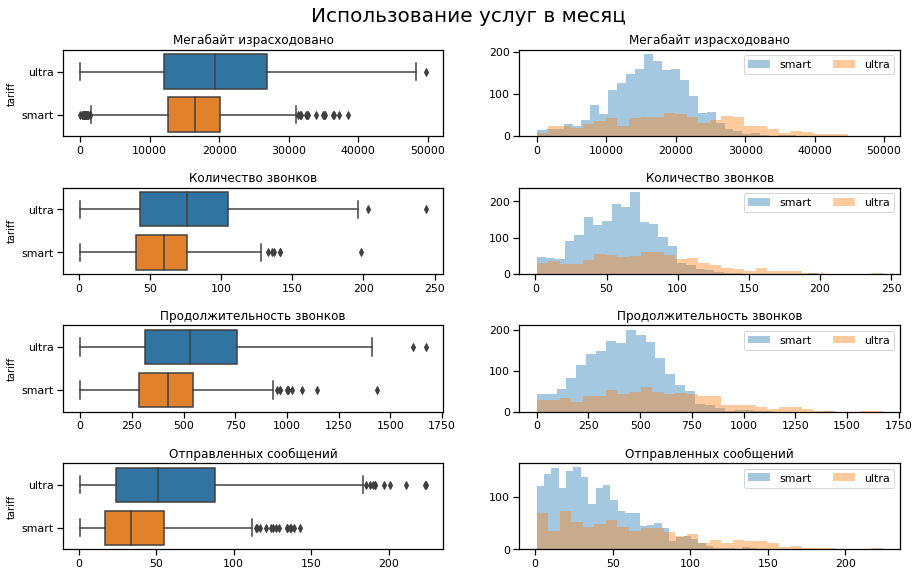

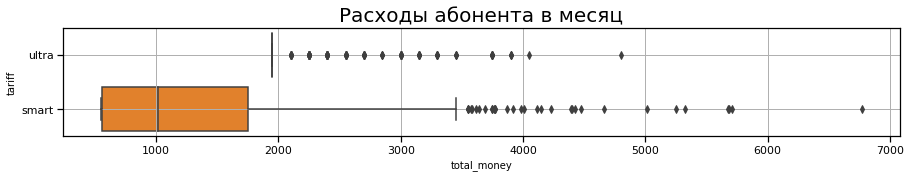

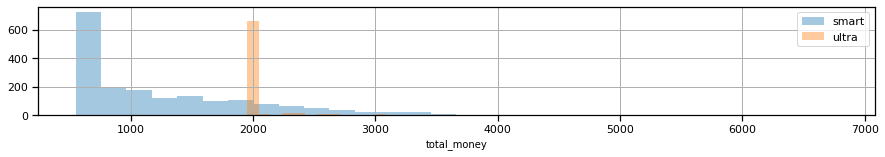

In [20]:

def boxplot(total_pivot, columns, titles, subplots_left, subplots_right):
    fig = plt.figure(figsize=(15,20))
    
    fig.subplots_adjust(hspace=0.6, top=0.95)
    columns_titles  = zip(columns,titles, subplots_left,subplots_right)
    for col in columns_titles:
        column = col[0]
        title = col[1]
        left_subplots = col[2]
        right_subplots = col[3]
        sns.set_context("notebook", font_scale=1, rc={"font.size":10,"axes.labelsize":10})
        ax1 = fig.add_subplot(left_subplots)
        ax2 = fig.add_subplot(right_subplots)
        fig.suptitle('Использование услуг в месяц', fontsize=20)
        sns.boxplot(x= column,y = 'tariff', data=total_pivot, ax = ax1)
        ax1.set_xlabel('')
        ax1.set_title(title)
        sns.distplot(smart[column], bins = 30, kde = False, ax = ax2, label = 'smart')
        sns.distplot(ultra[column], bins = 30, kde = False, ax = ax2, label = 'ultra')
        ax2.legend(['smart', 'ultra'], ncol=10, loc='upper right')
        ax2.set_title(title)
        ax2.set_xlabel('')
    plt.show()

            
columns = ['mb_used', 'count_calls', 'calls_duration', 'messages','total_money']            
titles = ['Мегабайт израсходовано','Количество звонков','Продолжительность звонков', 'Отправленных сообщений', 'Расходы в месяц']
left_subplots = [ 921+ x*2 for x in range(4)]
right_subplots = [ 922+ x*2 for x in range(4)]
boxplot(total_pivot, columns, titles, left_subplots, right_subplots)
fig = plt.figure(figsize=(15,2))
sns.boxplot(x= columns[4],y = 'tariff', data=total_pivot)
plt.grid()
plt.title('Расходы абонента в месяц', fontsize=20)
plt.show()
fig = plt.figure(figsize=(15,2))
sns.distplot(smart[columns[4]], bins = 30, kde = False, label = 'smart')
sns.distplot(ultra[columns[4]], bins = 30, kde = False, label = 'ultra')
plt.legend()
plt.grid()

Интернет

С тарифом Ultra люди активней используют интернет, но большинство укладывается в лимит, а половина пользователей использует не больше 2/3 предоставленного лимита. На тарифе smart интернетом пользуются тоже часто, а предоставленного лимита не хватает даже половине пользователей. Расход  интернет-трафика абонентов Smart находится в более узком диапазоне чем у абонентов Ultra. Хорошо заметно увеличение количества абонентов, которые используют количество интернет-трафика, близкое к предоставленному лимиту в 15 Гб. На тарифе Ultra диапазон распределения расходов интернет-трафика широкий, а предоставленный лимит составляет 30 Гб, такого лимита хватает большей части абонентов тарифа.

Звонки

Что касается звонков, то на тарифе Ultra звонки делают чаще чем на тарифе smart, а их продолжительность за месяц выше. Со звонками ситуация аналогичная ситуации с интернет-трафиком. На тарифе Smart большинство пользователей старается уложиться в лимит в 500 минут, распределение общей продолжительности происходит в достаточно узком диапазоне.
Тариф Ultra предоставляет лимит в 3000 минут и мало кому удается приблизиться хотя бы к его половине. Распределение происходит на более широком диапазоне и нет таких выраженных пиков как у тарифа Smart.

Сообщения 

Почти все пользователи тарифа smart укладываются в предоставленный лимит, а на тарифе ultra лимит в 1000 сообщений оказался настолько большим, что из данной выборки никому не удалось использовать его даже на 1/4. Как и в двух предыдущих случаях сообщения имеют выраженный пик только у тарифа Smart, примерно четверть пользователей не укладывается в предоставленный лимит. Несмотря на огромный лимит в 1000 соообщений пользователи тарифа Ultra редко превышают 1/5 этого лимита.

Расходы

Расходы пользователей тарифов в корне отличаются. Тариф 'ultra' стоит почти в 4 раза дороже и предлагает расширенный пакет услуг, входящих в базовую стоимость.У подавляющего количества пользователей 'ultra' расходы ограничиваются оплатой тарифного плана, поэтому на графике это отображено вертикальной линий вокруг стоимости тарифа в 1950 рублей.
Тариф Smart предоставляет более гибкую политику и предлагает пользователю самому решать за что платить. Основная масса пользователей за месяц платит меньше чем оплата тарифа Ultra, а начинается с абонентской платы в 550 рублей за тариф Smart.

Тариф Smart предполагает дополнительные расходы при активном использовании, распределение значений начинается с абонентской платы, а в редких случаях суммарные расходы превышают абонентскую плату за тариф Ultra.

Тариф Ultra изначально дорогой и как показывают графики мало кто превышает предоставленный лимит, а в случае превышения тарифы на дополнительные пакеты гораздо выгодней. В случае тарифа Ultra все дополнительные расходы связаны с приобретением интернет-трафика, а для тарифа Smart это является главной составляющей.

<h1 style="color:green; margin-bottom:5px">Smart. Зависимость расходов от дополнительных пакетов</h1> 
Средний расход пользователя тарифа смарт состовляет 1350 рублей со стандартным отклонением в 860 рублей. Исходя из анализа состовляющих совокупного расходы можно предположить, что основные расходы приходятся на интернет-трафик, после чего идут звонки и лишь небольшую часть составляют сообщения

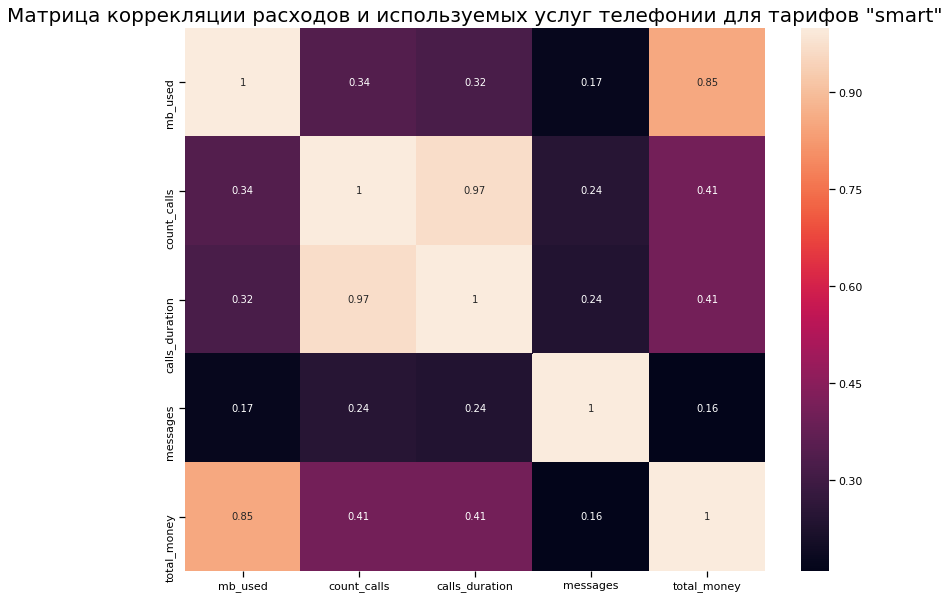

In [21]:
plt.figure(figsize=(13, 10))
ax = sns.heatmap(smart[['mb_used', 'count_calls', 'calls_duration', 'messages','total_money']].corr(),annot = True)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5) #устанавливаем границы вручную
plt.title('Матрица коррекляции расходов и используемых услуг телефонии для тарифов "smart"', fontsize = 20)
plt.show()

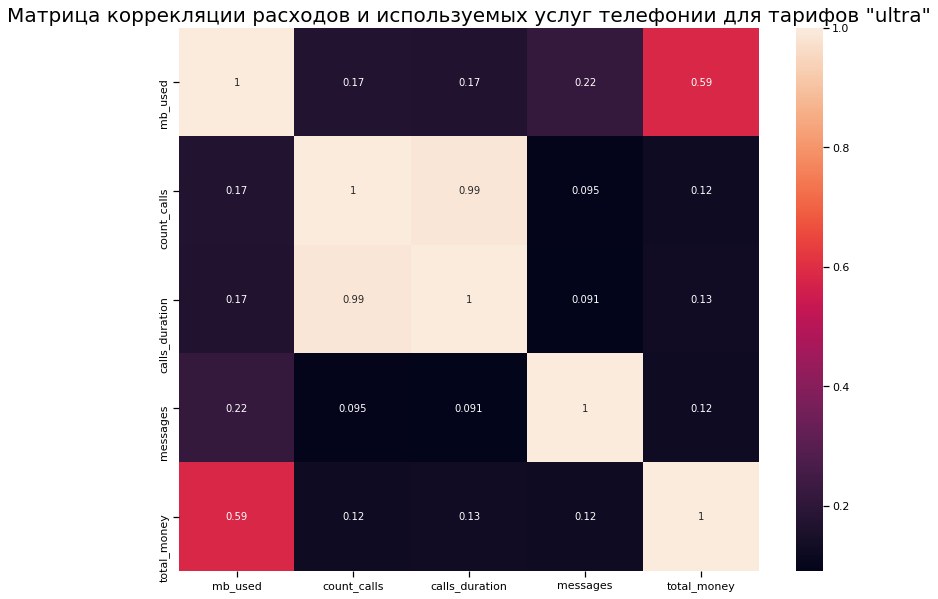

In [22]:
plt.figure(figsize=(13, 10))
ax = sns.heatmap(ultra[['mb_used', 'count_calls', 'calls_duration', 'messages','total_money']].corr(),annot = True)
i, k = ax.get_ylim()
ax.set_ylim(i+0.5, k-0.5) #устанавливаем границы вручную
plt.title('Матрица коррекляции расходов и используемых услуг телефонии для тарифов "ultra"', fontsize = 20)
plt.show()

на матрицах кореляции видно, что для обоих тарифов количество потребляемого трафика сильней всего влияет на расходы абонента. Это подтверждает картину распределения используемых услуг и как они соотносятся с предоставленными на тарифах лимитами.

Также кореляция подтверждает, что на тарифе 'smart' выше как зависимость от потреблённого трафика так и от звонков. Смс для обоих тарифов не является фактором, от которого зависят расходы абонента. Как было видно на предыдущих графиках, абоненты редко превышают предоставленный им лимит.

<h1 style="color:green; margin-bottom:5px">Гипотеза равенства средних расходов клиента в месяц</h1> 

Нулевая гипотеза: средние значения для  тарифов Smart и Ultra равны.

Альтернативная гипотеза: не равны.

In [23]:
alpha = 0.01
    
results = st.ttest_ind(
    smart['total_money'], 
    ultra['total_money'], equal_var =  False)

print('p-значение:', results.pvalue)
print()
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу равенства средних расходов клиента в месяц для тарифов 'smart и 'ultra' ")
else:
    print("Не получилось отвергнуть нулевую гипотезу равенства средних расходов клиента в месяц для тарифов 'smart и 'ultra'")
    
print()    
print('Среднее суммарных расходов тарифа Smart:',smart['total_money'].mean())
print()
print('Среднее суммарных расходов тарифа Ultra:',ultra['total_money'].mean())

p-значение: 3.0219026919316575e-206

Отвергаем нулевую гипотезу равенства средних расходов клиента в месяц для тарифов 'smart и 'ultra' 

Среднее суммарных расходов тарифа Smart: 1295.377545691906

Среднее суммарных расходов тарифа Ultra: 2049.7340425531916


В среднем тариф "ultra" приносит больше денег

<h3 style="color:green">Москва и регионы. Анализ расходов</h3> 


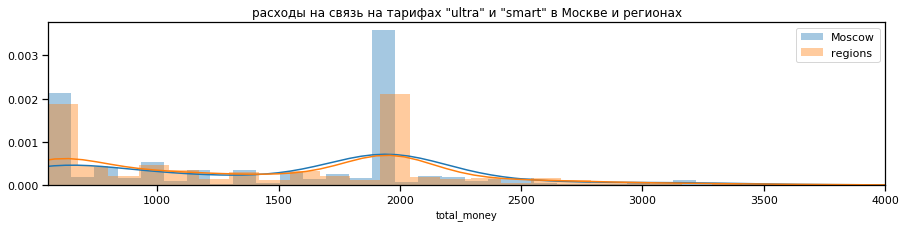

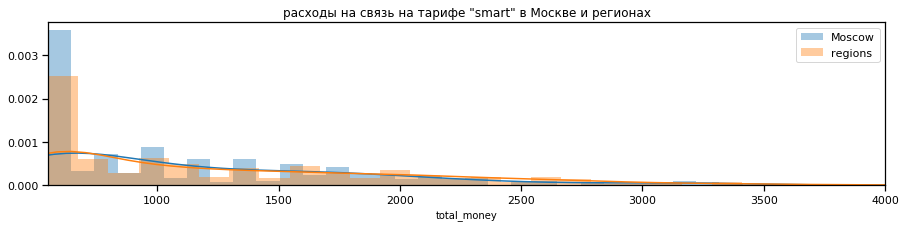

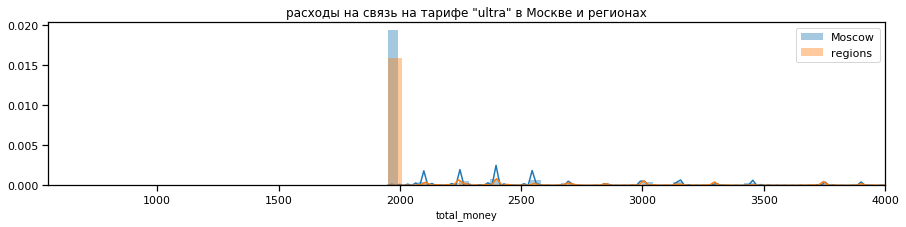

In [24]:
moscow_smart = moscow_smart.dropna().reset_index(drop = True)
regions_smart = regions_smart.dropna().reset_index(drop = True)
moscow_ultra = moscow_ultra.dropna().reset_index(drop = True)
regions_ultra = regions_ultra.dropna().reset_index(drop = True)


plt.figure(figsize=(15, 3))
sns.distplot(moscow['total_money'], bins = 50, label = 'Moscow')
sns.distplot(regions['total_money'], bins = 50, label = 'regions')
plt.title('расходы на связь на тарифах "ultra" и "smart" в Москве и регионах')
plt.xlim(550, 4000)
plt.legend()
plt.show()
plt.figure(figsize=(15, 3))
sns.distplot(moscow_smart['total_money'], bins = 50, label = 'Moscow')
sns.distplot(regions_smart['total_money'], bins = 50, label = 'regions')
plt.title('расходы на связь на тарифе "smart" в Москве и регионах')
plt.xlim(550, 4000)
plt.legend()
plt.show()
plt.figure(figsize=(15, 3))
sns.distplot(moscow_ultra['total_money'], bins = 50, label = 'Moscow')
sns.distplot(regions_ultra['total_money'], bins = 50, label = 'regions')
plt.title('расходы на связь на тарифе "ultra" в Москве и регионах')
plt.xlim(550, 4000)
plt.legend()
plt.show()

На графиках видно, что в Москве и регионах расходы очень похожи

<h3 style="color:green">Проверка гипотезы равенства средних расходов на тарифе Smart в Москве и регионах</h3> 

Теперь проверим статистически, насколько вероятно равенство средних значений для расходов в Москве и регионах

Нулевая гипотеза: средние значения для  тарифов Smart в Москве и регионах равны.

Альтернативная гипотеза: не равны.

In [25]:

alpha = 0.05
    
regions_smart_results = st.ttest_ind(moscow_smart['total_money'], regions_smart['total_money'], equal_var =  False)

print('p-значение:', regions_smart_results.pvalue)
print()
if (regions_smart_results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу равенства средних расходов клиента в месяц для тарифов для тарифов 'smart' в Москве и регионах ")
else:
    print("Не получилось отвергнуть нулевую гипотезу равенства средних расходов клиента в месяц для тарифов 'smart' в Москве и регионах")
    
print()
print('Среднее значение для тарифа Smart в Москве:',moscow_smart['total_money'].mean())
print()
print('Среднее значение для тарифа Smart в регионах:',regions_smart['total_money'].mean())

p-значение: 0.017816916670270938

Отвергаем нулевую гипотезу равенства средних расходов клиента в месяц для тарифов для тарифов 'smart' в Москве и регионах 

Среднее значение для тарифа Smart в Москве: 1197.1433447098975

Среднее значение для тарифа Smart в регионах: 1313.1226880394574


<h1 style="color:green; margin-bottom:5px">Проверка гипотезы равенства средних расходов на тарифе  Ultra в Москве и регионах</h1> 

Нулевая гипотеза: средние значения для  тарифов Ultra в Москве и регионах равны.

Альтернативная гипотеза: не равны.

In [26]:
alpha = 0.05
    
regions_ultra_results = st.ttest_ind(moscow_ultra['total_money'], regions_ultra['total_money'], equal_var =  False)

print('p-значение:', regions_ultra_results.pvalue)

if (regions_ultra_results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу равенства средних расходов клиента в месяц для тарифов 'ultra' в Москве и регионах ")
else:
    print("Не получилось отвергнуть нулевую гипотезу равенства средних расходов клиента в месяц для тарифов 'ultra' в Москве и регионах")
print()
print('Среднее значение для тарифа Ultra в Москве:',moscow_ultra['total_money'].mean())
print()
print('Среднее значение для тарифа Ultra в регионах:',regions_ultra['total_money'].mean())

p-значение: 0.052674788614386334
Не получилось отвергнуть нулевую гипотезу равенства средних расходов клиента в месяц для тарифов 'ultra' в Москве и регионах

Среднее значение для тарифа Ultra в Москве: 2092.4242424242425

Среднее значение для тарифа Ultra в регионах: 2034.4765342960288


<h3 style="color:green">Выводы по проверке гипотез по тарифам в Москве и регионах</h3> 


Визуальный анализ данных дал исчерпывающую картину однообразности данных в Москве и регионах. Гистограммы распределения похожи, ключевые параметры, такие как среднее и стандартное отклонение тоже. Несмотря на это поведение абонентов в Москве и регионах различно, хотя и не имеет ярковыраженного характера.

<h3 style="color:green">Общий вывод:</h3> 

Главной задачей исследования было выяснить какой тариф прибыльней для дальнейшей рекламной компании.

Выгодней для компании получается тариф "ultra", за счёт того, что лишь небольшая доля превышает предоставленный лимит.
Тариф "smart" можно назвать сбалансированным, для большинства предоставленных лимитов не хватает и они платят за дополнительные пакеты услуг, что увеличивает суммарную выручку.


Тариф smart более выгодный для тех, кто не использует много интернет-трафика. Позиционирует себя как дешёвый по отношению к ultra, но за счёт дополнительных расходов средняя выручка оказывается в два раза больше стоимости тарифа. Общая картина распределения ежемесячной платы за тариф распределена нормально и связано это в первую очередь с дополнительными пакетами интернета.

На тарифе ultra люди в основном платят только сам тарифный план, а если и платят за доп. пакеты, то , как правило, это составляет малую долю от всей стоимости. Звонки и смс на этом тарифном плане согласно выборке представлены с огромным запасом, за счёт этого тариф ultra можно назвать более прибыльным, так как средний расход трафика на обоих тарифных планах сопоставим 16 и 19 гб(smart и ultra соответственно), а средняя прибыль с тарифов отличается на 700 рублей.

Москва от регионов по характеру использования тарифов не сильно отличается, больше заметна неравномерная выборка из за которой есть пробелы при построении гистограмм. Для Москвы выборка гораздо меньше. 1 к 5.